In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('cs-training.csv').drop('Unnamed: 0', axis=1)
test = pd.read_csv('cs-test.csv').drop('Unnamed: 0', axis=1)

In [3]:
train.shape

(150000, 11)

In [4]:
test.shape

(101503, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [6]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
train.duplicated().value_counts()

False    149391
True        609
Name: count, dtype: int64

In [8]:
train_remdup = train.drop_duplicates()

In [9]:
train_remdup.duplicated().value_counts()

False    149391
Name: count, dtype: int64

In [10]:
train_remdup.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [11]:
def missing_percentage(df):
    missing_percentage = round(df.isnull().sum() / len(df) * 100, 2)
    return missing_percentage

In [12]:
missing_percentage(train_remdup)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

In [13]:
train_remdup['NumberOfDependents'].isnull().sum()

np.int64(3828)

In [14]:
train_remdup[train_remdup['NumberOfDependents'].isnull()].describe() # Filtering the all columns based on the missing values in NumberOfDependents

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,0.0,3828.000000,3828.000000,3828.000000,3828.000000,0.0
mean,0.046499,11.003369,59.741641,0.572623,1110.713689,NaN,5.708986,0.497126,0.605799,0.474138,NaN
std,0.210592,240.656436,18.345175,6.527320,4235.410634,NaN,4.086337,6.523199,0.920990,6.520343,NaN
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.009228,48.000000,0.000000,25.000000,NaN,3.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.047670,61.000000,0.000000,398.000000,NaN,5.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.259028,74.000000,0.000000,1587.000000,NaN,8.000000,0.000000,1.000000,0.000000,NaN
max,1.000000,10821.000000,109.000000,98.000000,220516.000000,NaN,30.000000,98.000000,15.000000,98.000000,NaN


In [15]:
train_remdup[train_remdup['MonthlyIncome'].isnull()].describe() # Filtering the all columns based on the missing values in MonthlyIncome

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29221.000000,29221.000000,29221.000000,29221.000000,29221.000000,0.0,29221.000000,29221.000000,29221.000000,29221.000000,25393.000000
mean,0.056603,6.757056,56.395127,0.452483,1702.565005,NaN,7.314192,0.355224,0.886691,0.323398,0.321309
std,0.231087,219.705933,15.293975,5.145292,4279.494336,NaN,4.821894,5.136737,1.036795,5.125615,0.815421
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016851,46.000000,0.000000,155.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.081840,57.000000,0.000000,1198.000000,NaN,6.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.428256,67.000000,0.000000,2407.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,109.000000,98.000000,329664.000000,NaN,45.000000,98.000000,23.000000,98.000000,9.000000


In [16]:
train_remdup.groupby(['NumberOfDependents']).size()

NumberOfDependents
0.0     86392
1.0     26314
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
dtype: int64

In [17]:
train_miss_dep = train_remdup[train_remdup['NumberOfDependents'].isnull()]
train_not_miss_dep = train_remdup[train_remdup['NumberOfDependents'].notnull()]

In [18]:
train_miss_dep['NumberOfDependents'] = train_miss_dep['NumberOfDependents'].fillna(0)
train_miss_dep['MonthlyIncome'] = train_miss_dep['MonthlyIncome'].fillna(0)

/var/folders/2d/8hk7zdn135qcfnl79rblqtb80000gn/T/ipykernel_17429/2523040704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_miss_dep['NumberOfDependents'] = train_miss_dep['NumberOfDependents'].fillna(0)
/var/folders/2d/8hk7zdn135qcfnl79rblqtb80000gn/T/ipykernel_17429/2523040704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_miss_dep['MonthlyIncome'] = train_miss_dep['MonthlyIncome'].fillna(0)


In [19]:
missing_percentage(train_miss_dep)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [20]:
missing_percentage(train_not_miss_dep)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.44
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

In [21]:
train_not_miss_dep['MonthlyIncome'].fillna(train_not_miss_dep['MonthlyIncome'].median(), inplace=True)

/var/folders/2d/8hk7zdn135qcfnl79rblqtb80000gn/T/ipykernel_17429/4016179287.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_not_miss_dep['MonthlyIncome'].fillna(train_not_miss_dep['MonthlyIncome'].median(), inplace=True)
/var/folders/2d/8hk7zdn135qcfnl79rblqtb80000gn/T/ipykernel_17429/4016179287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [22]:
missing_percentage(train_not_miss_dep)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [23]:
filled_train = pd.concat([train_miss_dep, train_not_miss_dep], axis=0)

In [24]:
filled_train.shape

(149391, 11)

In [25]:
(filled_train['SeriousDlqin2yrs'].value_counts()/filled_train['SeriousDlqin2yrs'].count())*100

SeriousDlqin2yrs
0    93.300132
1     6.699868
Name: count, dtype: float64

In [26]:
filled_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [27]:
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile(0.99)

np.float64(1.0939219183000002)

In [28]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] < 1].shape

(146053, 11)

In [29]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 1].shape

(3321, 11)

In [30]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10]['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    224
1     17
Name: count, dtype: int64

In [31]:
filled_train.shape

(149391, 11)

In [32]:
print(filled_train.columns)


Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [33]:
# Remove rows where 'RevolvingUtilizationOfUnsecuredLines' is greater than 10
filled_train = filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] <= 10]


In [34]:
filled_train['age'].describe()

count    149150.000000
mean         52.308944
std          14.726114
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

<Axes: ylabel='age'>

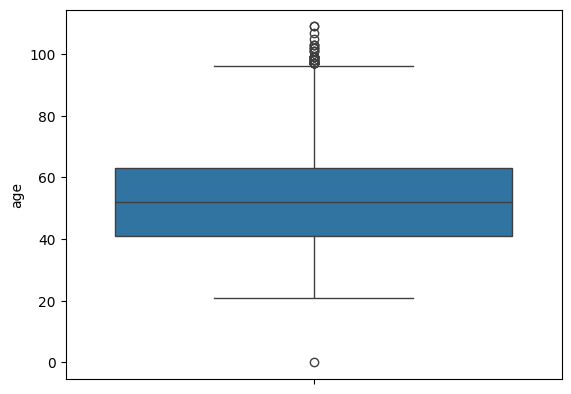

In [35]:
sns.boxplot(filled_train['age'])

In [36]:
filled_train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [37]:
filled_train.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()

NumberOfTime30-59DaysPastDueNotWorse
0     125239
1      16020
2       4588
3       1750
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       220
dtype: int64

In [38]:
filled_train.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

NumberOfTime60-89DaysPastDueNotWorse
0     141601
1       5723
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       220
dtype: int64

In [39]:
filled_train.groupby(['NumberOfTimes90DaysLate']).size()

NumberOfTimes90DaysLate
0     140875
1       5227
2       1554
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       220
dtype: int64

In [40]:
filled_train[filled_train['NumberOfTimes90DaysLate'] >= 96].SeriousDlqin2yrs.value_counts(normalize=True)*100

SeriousDlqin2yrs
1    60.444444
0    39.555556
Name: proportion, dtype: float64

In [41]:
filled_train['DebtRatio'].describe()

count    149150.000000
mean        354.085328
std        2042.235713
min           0.000000
25%           0.177334
50%           0.368200
75%           0.874241
max      329664.000000
Name: DebtRatio, dtype: float64

<Axes: xlabel='DebtRatio', ylabel='Density'>

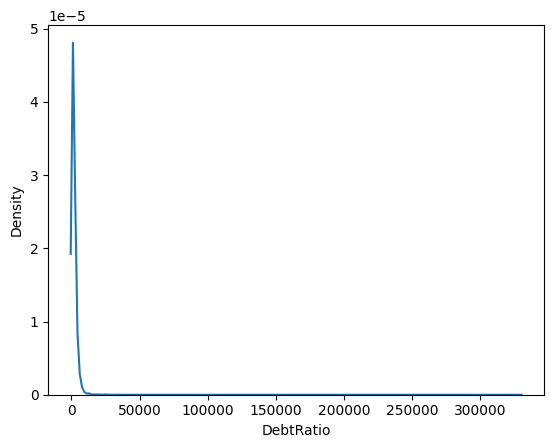

In [42]:
sns.kdeplot(filled_train['DebtRatio'])

In [43]:
filled_train[filled_train['DebtRatio']>3000].SeriousDlqin2yrs.value_counts(normalize=True)*100

SeriousDlqin2yrs
0    94.125526
1     5.874474
Name: proportion, dtype: float64

In [44]:
filled_train['DebtRatio'].quantile([0.975])

0.975    3492.0
Name: DebtRatio, dtype: float64

In [45]:
filtered_df = filled_train[(filled_train['DebtRatio'] > 3492) & (filled_train['SeriousDlqin2yrs'] == filled_train['MonthlyIncome'])]
filtered_df['SeriousDlqin2yrs'].value_counts()


SeriousDlqin2yrs
0    380
1      2
Name: count, dtype: int64

In [46]:
filled_train.drop(filtered_df.index, inplace=True)

In [47]:
filled_train.shape

(148768, 11)

In [48]:
filled_train['SeriousDlqin2yrs'].value_counts(normalize=True)*100

SeriousDlqin2yrs
0    93.284846
1     6.715154
Name: proportion, dtype: float64

In [50]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [55]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Import the necessary libraries

# Split the dataset into features and target variable
X = filled_train.drop('SeriousDlqin2yrs', axis=1)
y = filled_train['SeriousDlqin2yrs']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
model = XGBClassifier(tree_method='exact')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9354372521341668


In [58]:
# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

Confusion Matrix:
 [[27429   303]
 [ 1618   404]]


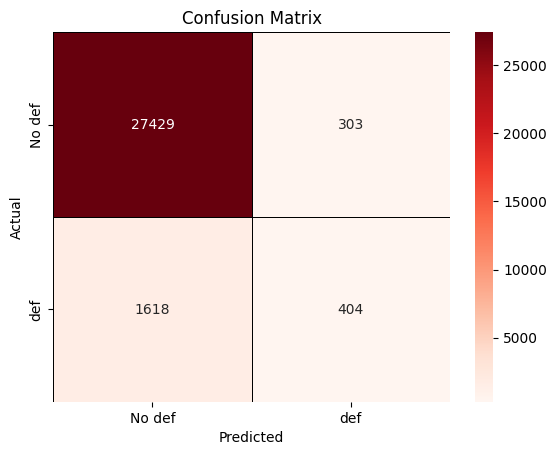

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a heatmap of the confusion matrix with black lines to separate the regions
class_labels = ['No def','def']
sns.heatmap(conf_mat, annot=True, cmap='Reds', fmt='d', xticklabels=class_labels, yticklabels=class_labels, linewidths=0.5, linecolor='black')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()
plt.show()

In [80]:
from sklearn.metrics import classification_report

# Generate the precision report
report = classification_report(y_test, y_pred, target_names=class_labels)

# Print the precision report
print(report)

              precision    recall  f1-score   support

      No def       0.94      0.99      0.97     27732
         def       0.57      0.20      0.30      2022

    accuracy                           0.94     29754
   macro avg       0.76      0.59      0.63     29754
weighted avg       0.92      0.94      0.92     29754

